In [104]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import access_spectrum as acs
import run_empca
reload(run_empca)
from run_empca import *
import polyfit as pf
silent=False
# Remember, the windows are the INVERSE of the absorption features

Populating the interactive namespace from numpy and matplotlib


In [105]:
windowinfo = 'pickles/windowinfo.pkl'
elemwindows,window_all,window_peak,windowPeaks,windowPixels,tophats = acs.pklread(windowinfo)

In [106]:
specs = acs.pklread('red_clump/pickles/spectra_FE_H_u-0.4_d-0.5.pkl')[0]

In [107]:
errs = acs.pklread('red_clump/pickles/errs_FE_H_u-0.4_d-0.5.pkl')

In [108]:
SNR = specs/errs

In [109]:
vec = np.tile(elemwindows['N']+elemwindows['K'],(specs.shape[0],1))

In [110]:
falsespecs = np.ma.masked_array(vec,specs.mask)

In [111]:
noise = falsespecs/SNR

In [112]:
drawn_noise = noise*np.random.randn(noise.shape[0],noise.shape[1])

In [113]:
falsespecs += drawn_noise

In [114]:
falsespecs.mask[np.where(noise<1e-10)] = True
noise.mask[np.where(noise<1e-10)] = True

In [117]:
def vec_weight(elem,vec):
    w = elemwindows[elem]
    nw = np.ma.masked_array(pf.normweights(w))
    return np.ma.sum(nw*vec)
    
def arr_weight(elem,arr):
    w = elemwindows[elem]
    nw = np.ma.masked_array(pf.normweights(w))
    nws = np.tile(nw,(arr.shape[0],1))
    return np.ma.sum(nws*arr,axis=1)
    
def test_run(specs,noise,deltR2=2e-3,nvecs=5,mad=True,maxvec=5):
    m1,m2,w1,w2 = pix_empca(None,specs.T,noise,'test.pkl',nvecs=nvecs,deltR2=2e-3,gen=True,usemad=mad)
    R2_1 = R2(m1) #must be here (and not below resize) to avoid error
    R2_2 = R2(m2)
    R2_noise2 = R2noise(w2,m2,usemad=mad)
    resize_pix_eigvecs(specs.T,m1,nstars=5)
    resize_pix_eigvecs(specs.T,m2,nstars=5)
    m1elem = np.zeros((nvecs,len(elems)))
    m2elem = np.zeros((nvecs,len(elems)))
    specs_weight = np.ma.masked_array(np.zeros((len(elems),specs.shape[0])))
    noise_weight = np.ma.masked_array(np.zeros((len(elems),specs.shape[0])))
    for ind in range(len(elems)):
        specs_weight[ind] = arr_weight(elems[ind],specs)
        noise_weight[ind] = arr_weight(elems[ind],noise)
        for vec in range(nvecs):
            m1elem[vec][ind] = vec_weight(elems[ind],m1.eigvec[vec])
            m2elem[vec][ind] = vec_weight(elems[ind],m2.eigvec[vec])
    specs_weight.mask[np.where(noise_weight<1e-10)] = True
    noise_weight.mask[np.where(noise_weight<1e-10)] = True
    m3,m4,w3,w4 = elem_empca(None,specs_weight,noise_weight,'test2.pkl',nvecs=nvecs,gen=True,deltR2=2e-3,usemad=mad)        
    R2_3 = R2(m3)
    R2_4 = R2(m4)
    R2_noise4 = R2noise(w4,m4,usemad=mad)
    resize_pix_eigvecs(specs_weight,m3,nstars=5,dim2=len(elems))
    resize_pix_eigvecs(specs_weight,m4,nstars=5,dim2=len(elems))
    for n in range(maxvec):
        plt.figure(figsize=(12,3))
        plt.axhline(0,linestyle='--',color='k',linewidth=3)
        plt.plot(norm_eigvec(m1elem[n]),'o',markersize=8)
        plt.plot(norm_eigvec(m2elem[n]),'o',markersize=8)
        plt.plot(norm_eigvec(m3.eigvec[n]),'o',markersize=8)
        plt.plot(norm_eigvec(m4.eigvec[n]),'o',markersize=8)
        plt.xticks(range(len(elems)),elems)
        plt.ylabel('Eigenvenctor {0}'.format(n+1))
        plt.xlim(-1,len(elems)+1)
    plt.figure(figsize=(12,3))
    plt.plot(R2_1,marker='o',linewidth = 3,markersize=8)
    plt.plot(R2_2,marker='o',linewidth = 3,markersize=8)
    plt.axhline(R2_noise2,linestyle='--',color='b',linewidth=3,label='R2n_pix = {0:2f}'.format(R2_noise2))
    plt.fill_between(range(nvecs+1),R2_noise2,1,color='b',alpha=0.2)
    plt.plot(R2_3,marker='o',linewidth = 3,markersize=8)
    plt.plot(R2_4,marker='o',linewidth = 3,markersize=8)
    plt.axhline(R2_noise4,linestyle='--',color='r',linewidth=3,label='R2n_pix = {0:2f}'.format(R2_noise4))
    plt.fill_between(range(nvecs+1),R2_noise4,1,color='r',alpha=0.2)
    plt.legend(loc='best')

       iter        R2             rchi2
EMPCA  1/25       0.00000055  26274.29337700
R2: 0.999978985233
var, Vnoise  0.00684591416132 1.67750476854e-06
       iter        R2             rchi2
EMPCA  1/25      -1.20655828 18346907.37500420
EMPCA  2/25      -5.52758765 55839873.58778960
EMPCA  3/25       0.84685810 4464652.11880388
EMPCA  4/25       0.79915651  29638.48008363
EMPCA  5/25       0.65872826  33101.41512822
EMPCA  6/25       0.24689019  35277.31015257
EMPCA  7/25       0.59185651  77985.56913330
EMPCA  8/25       0.81199384  18108.52933174
EMPCA  9/25       0.96279096  15263.55597717
EMPCA 10/25       0.98323754  15681.66122270
EMPCA 11/25       0.97398710  15368.68060508
EMPCA 12/25       0.96665883  15312.79390189
EMPCA 13/25       0.95283332  15580.65348255
EMPCA 14/25       0.95887937  15223.10513790
EMPCA 15/25       0.96919436  15212.86049969
EMPCA 16/25       0.97292289  15420.19179304
EMPCA 17/25       0.96927158  15249.56272997
EMPCA 18/25       0.96371671  15193.72

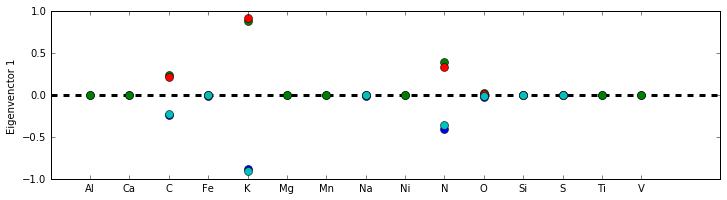

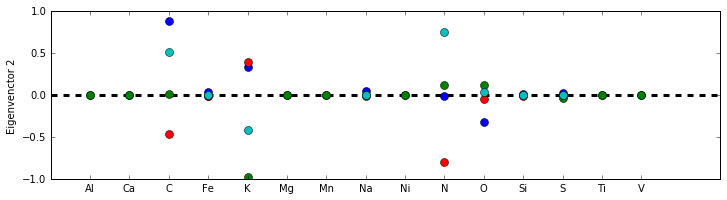

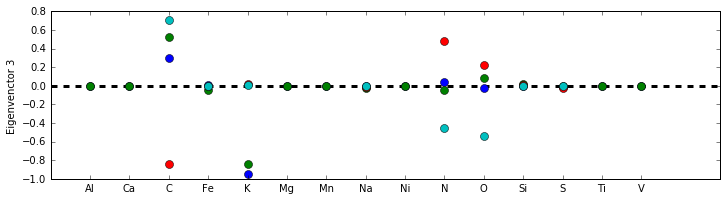

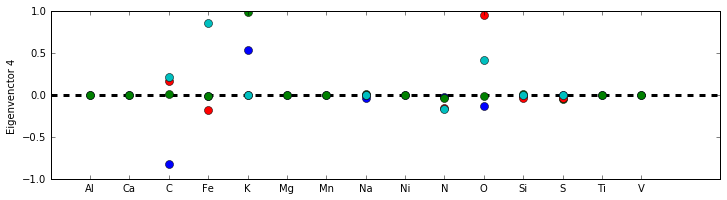

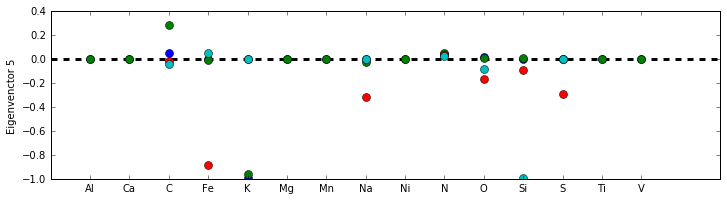

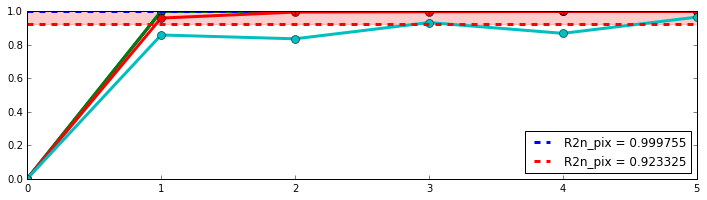

In [118]:
test_run(falsespecs,noise)